In [2]:
import pyedflib

def read_edf_file(file_path):
    try:
        f = pyedflib.EdfReader(file_path)
        num_signals = f.signals_in_file
        signal_labels = f.getSignalLabels()
        signals = [f.readSignal(i) for i in range(num_signals)]
        sample_frequency = f.getSampleFrequency(0)  # 假设所有通道的采样频率相同
        f.close()
        return signal_labels, signals, sample_frequency

    except Exception as e:
        print(f"Error reading .edf file: {e}")
        return None


file_path = "../database/sleep-cassette/SC4001E0-PSG.edf"
labels, data, frequency = read_edf_file(file_path)

if labels and data and frequency:
    print("Signal Labels:", labels)
    print("Data Shape:", [len(channel) for channel in data])
    print("Sample Frequency:", frequency)
else:
    print("Failed to read .edf file.")


Signal Labels: ['EEG Fpz-Cz', 'EEG Pz-Oz', 'EOG horizontal', 'Resp oro-nasal', 'EMG submental', 'Temp rectal', 'Event marker']
Data Shape: [7950000, 7950000, 7950000, 79500, 79500, 79500, 79500]
Sample Frequency: 100.0


ValueError: x and y must have same first dimension, but have shapes (7950000,) and (79500,)

D:\Anaconda3\Lib\site-packages\IPython\core\events.py:89: UserWarning: Creating legend with loc="best" can be slow with large amounts of data.
  func(*args, **kwargs)
D:\Anaconda3\Lib\site-packages\IPython\core\pylabtools.py:152: UserWarning: Creating legend with loc="best" can be slow with large amounts of data.
  fig.canvas.print_figure(bytes_io, **kw)


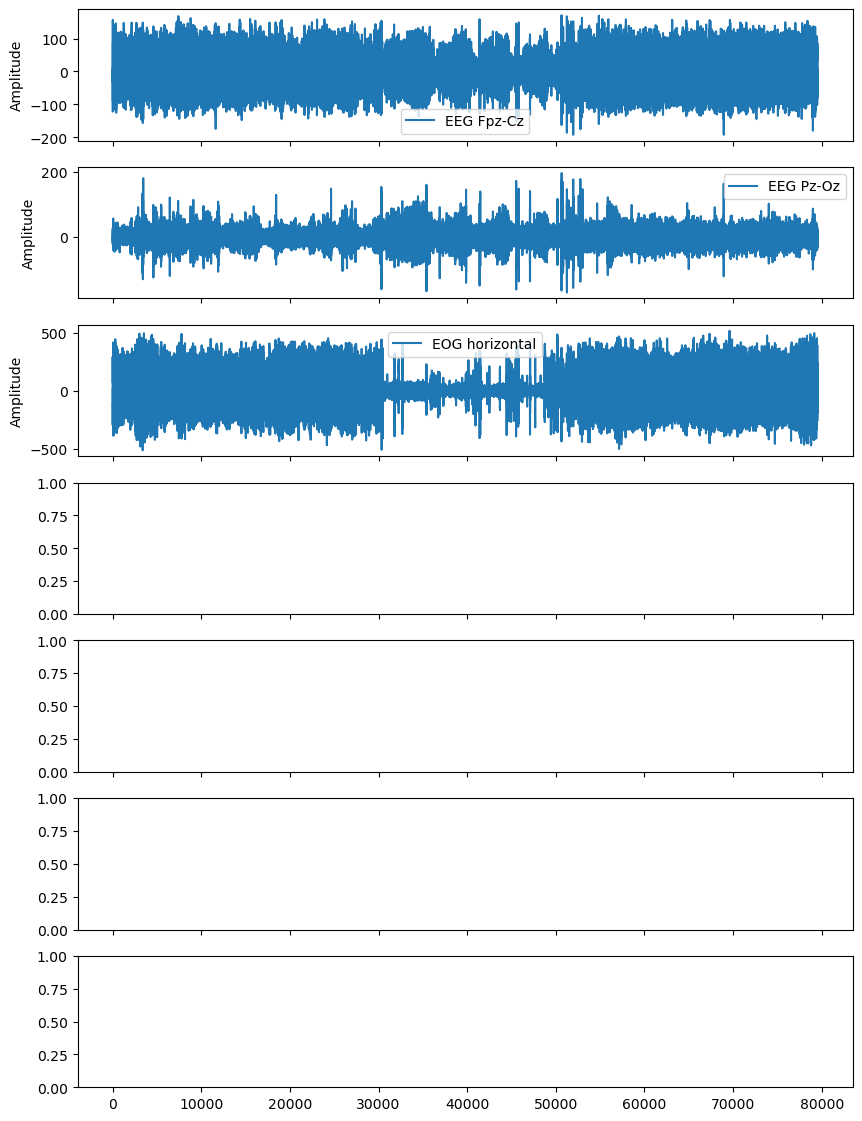

In [3]:
import matplotlib.pyplot as plt
import numpy as np

def plot_signals(signal_labels, signals, sample_frequency):
    num_channels = len(signal_labels)
    total_duration = len(signals[0]) / sample_frequency

    # 生成时间轴
    time_axis = np.linspace(0, total_duration, len(signals[0]))

    # 创建子图
    fig, axes = plt.subplots(num_channels, 1, sharex=True, figsize=(10, 2 * num_channels))

    # 绘制每个通道的信号
    for i in range(num_channels):
        axes[i].plot(time_axis, signals[i], label=signal_labels[i])
        axes[i].set_ylabel("Amplitude")
        axes[i].legend()

    # 设置共享的 x 轴标签
    axes[-1].set_xlabel("Time (seconds)")

    # 调整布局
    plt.tight_layout()
    plt.show()

plot_signals(labels, data, frequency)
